In [1]:
pip install textblob


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Users/rg/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing packages 

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import json
import csv
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob

/Users/rg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#Defining functions

def clean_text(text):
    # Converting text to lowercase
    text = text.lower()
    # Removing special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenizing the text using NLTK's word_tokenize
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ['dollar', 'market', 'price', 'column']
    stop_words.update(custom_stopwords)  # adding stopwords to the basic list
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Joining tokens back to string
    cleaned_text = ' '.join(lemmatized_tokens)
    return cleaned_text
    
    
#Tokenizer function 
def tokenize_data(tokenizer, df):
    return tokenizer(df['clean_text'].tolist(), padding=True, truncation=True, max_length=512)

In [4]:
#Setting the environment variable to disable the memory limit safeguard
os.environ['PYTORCH_MPS_HIGH_WATERMARK_RATIO'] = '0.0'

In [5]:
#Downloads for text-processing 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/rg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/rg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rg/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Sentiment Analysis - Using TextBlob

In [6]:
#Reading-in unlabeled dataset 

news = pd.read_csv('./news_text.csv')

In [7]:
#Converting text to string object
news['articlesShortDescription'] = news['articlesShortDescription'].astype(str)

In [8]:
#Cleaning and preparing the text data for the model
news['clean_text'] = news['articlesShortDescription'].apply(clean_text)

### Sentiment Analysis on Full Unlabeled Dataset

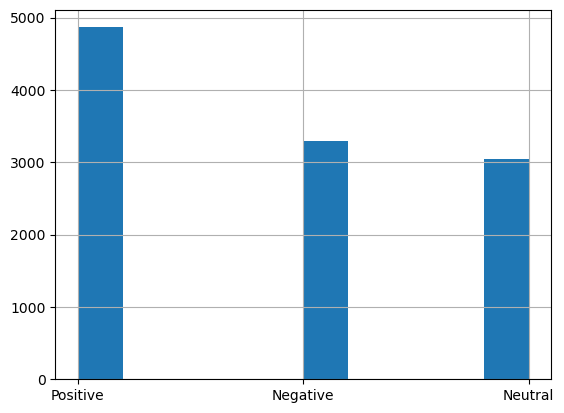

In [9]:
#Making predictions on unlabeled dataset using TextBlob

sentiment_pred=[]
subjectivity_pred=[]
sentiment_score_pred=[]

#Passing news data through for-loop 
for i in news['clean_text'].values:
    text = TextBlob(i)
    sentiment_score_pred.append(text.sentiment[0])
    if text.sentiment[0]<0:
        sentiment_pred.append('Negative')
    elif text.sentiment[0]>0:
        sentiment_pred.append('Positive')
    else:
        sentiment_pred.append('Neutral')
    subjectivity_pred.append(text.sentiment[1])

news['Polarity']=sentiment_score_pred
news['Subjectivity']=subjectivity_pred
news['Overall Sentiment']=sentiment_pred

news['Overall Sentiment'].hist()

news_sentiment_TB = news.copy() 

# news_sentiment_TB.to_csv('news_sentiment_TB', index=False) #saving as CSV 

In [10]:
news_sentiment_TB.head()

,articlesShortDescription,Date,clean_text,Polarity,Subjectivity,Overall Sentiment
0,A government-appointed panel has proposed sett...,2024-04-02 10:36:27,governmentappointed panel proposed setting ind...,0.023846,0.458974,Positive
1,Around 400 train drivers for BHP's Western Aus...,2023-11-20 05:37:03,around train driver bhps western australian ir...,-0.040000,0.200000,Negative
2,China's state planning commission will work wi...,2023-11-15 13:50:01,china state planning commission work dalian co...,0.100000,0.625000,Positive
3,China's state-backed Dalian Commodity Exchange...,2023-11-15 12:19:48,china statebacked dalian commodity exchange we...,0.000000,0.062500,Neutral
4,China's crude steel output fell for the fourth...,2023-11-15 03:49:21,china crude steel output fell fourth consecuti...,-0.433333,0.566667,Negative
